In [138]:
import os
from scipy.interpolate import interp1d
import kernel_est_funcs as kef

In [93]:
# If in Colab and not yet downloaded, download GitHub repository
if os.getcwd() == '/content': 
    if not os.path.exists('/content/Cascade'):
        !git clone https://github.com/HelmchenLabSoftware/Cascade
    os.chdir('Cascade')
    
# If executed as jupyter notebook on own computer, change to parent directory for imports
if os.path.basename( os.getcwd() ) == 'Demo scripts':
    %cd ..
    print('New working directory:', os.getcwd() )

# set environment variables depending on colab or jupyter environment
if os.getcwd() == '/content/Cascade':
    ENV = 'colab'
else: # assume jupyter
    ENV = 'jupyter'
    #%matplotlib notebook

In [94]:
# Imports:
import matplotlib.pyplot as plt
import numpy as np

from cascade2p import utils
import ipywidgets as widgets

## Load datasets
datasets = utils.load_all_ground_truth( ground_truth_folder='Ground_truth')
dataset_names = sorted(list( datasets.keys() ))

plt.style.use('seaborn')

print('\nSuccessfully loaded ground truth data.')


Successfully loaded ground truth data.


/tmp/ipykernel_23166/611059841.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [95]:
#@markdown Click the play button on the left to initialize the interactive exploration. Use the dropdown menu (`Dataset`) to select a dataset und use the slider (`Recording`) to switch between different continuous recordings. For some datasets, several recordings exist for the same neuron.

#@markdown Use the other two sliders to zoom into the plot (`Zoom`) and to move along the time axis (`Offset`).

#@markdown If you run this in a Jupyter notebook, you can use the magnifying glass button to draw rectangles with the left mouse button to zoom in, and the right mouse button to zoom out.

def plot_neuron(Dataset, Recording, Zoom=1, Offset=0):
    """Plot the fluorescence and spikes for a single recording of the dataset
    
    Parameters
    -------
    Dataset: str
        Name of the dataset, which is identical to the folder name in the Ground_truth folder
    Recording: int
        Number of the recording in this dataset, pooled across all files in this dataset
    """

    # correct for different plot sizes in colab and jupyter
    if ENV=='colab':   plt.figure(figsize=(20,8))
    if ENV=='jupyter': plt.figure(figsize=(8,5))
    
    
    data = datasets[Dataset][Recording]
    # plt.cla()
    plt.plot( data['t'][4:], data['dff'][4:], lw=0.5)
    
    max_dff = np.max( data['dff'][4:])
    min_dff = np.min( data['dff'][4:])
    
    plt.eventplot( data['spikes'], lineoffsets=min_dff - max_dff/20,
                  linelengths=max_dff/20, color='k', lw=1.5)
    
    # TODO: add number of APs if they are very close to each other or firing rate
    
    plt.xlabel('Time [s]')
    plt.ylabel('Relative Fluorescence Change [Df/f]')
    plt.title('Dataset: {}   Recording: {}   Frame rate: {:.1f} Hz'.format(Dataset, Recording, data['frame_rate']))
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adjust zoom and offset
    if (Zoom != 1) or (Offset != 0):
        t_min = Offset
        t_max = (data['t'][-1] / Zoom) + Offset
        plt.xlim( (t_min, t_max) )
    
dataset_widget = widgets.Dropdown(options=dataset_names, value =dataset_names[9] )
recording_widget = widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)

# update number of recordings depending on dataset
def update_nr_recordings(*args):
    recording_widget.max = len( datasets[dataset_widget.value] ) - 1
    
dataset_widget.observe( update_nr_recordings, 'value')
    
widgets.interact(plot_neuron, Dataset=dataset_widget,
                            Recording=recording_widget,
                            Zoom=widgets.IntSlider(min=1, max=50, step=1, value=1, continuous_update=False),
                            Offset=widgets.IntSlider(min=0, max=100, step=1, value=0, continuous_update=False)            
                )

# update manually the first time:
update_nr_recordings()

interactive(children=(Dropdown(description='Dataset', index=9, options=('DS01-OGB1-m-V1', 'DS02-OGB1-2-m-V1', …

In [96]:
dataset_names

['DS01-OGB1-m-V1',
 'DS02-OGB1-2-m-V1',
 'DS03-Cal520-m-S1',
 'DS04-OGB1-zf-pDp',
 'DS05-Cal520-zf-pDp',
 'DS06-GCaMP6f-zf-aDp',
 'DS07-GCaMP6f-zf-dD',
 'DS08-GCaMP6f-zf-OB',
 'DS09-GCaMP6f-m-V1',
 'DS10-GCaMP6f-m-V1-neuropil-corrected',
 'DS11-GCaMP6f-m-V1-neuropil-corrected',
 'DS12-GCaMP6s-m-V1-neuropil-corrected',
 'DS13-GCaMP6s-m-V1-neuropil-corrected',
 'DS14-GCaMP6s-m-V1',
 'DS15-GCaMP6s-m-V1',
 'DS16-GCaMP6s-m-V1',
 'DS17-GCaMP5k-m-V1',
 'DS18-R-CaMP-m-CA3',
 'DS19-R-CaMP-m-S1',
 'DS20-jRCaMP1a-m-V1',
 'DS21-jGECO1a-m-V1',
 'DS22-OGB1-m-SST-V1',
 'DS23-OGB1-m-PV-V1',
 'DS24-GCaMP6f-m-PV-V1',
 'DS25-GCaMP6f-m-SST-V1',
 'DS26-GCaMP6f-m-VIP-V1',
 'DS27-GCaMP6f-m-PV-vivo-V1',
 'X-DS00-OGB1-m-S1',
 'X-DS09-GCaMP6f-m-V1',
 'X-DS10-GCaMP6f-m-V1',
 'X-DS11-GCaMP6s-m-V1',
 'X-DS12-GCaMP6s-m-V1',
 'X-NAOMi-GCaMP6f-simulated']

In [121]:
rec = 0
data = datasets['DS01-OGB1-m-V1'][rec]
dff = data['dff']
times = data['t']
spikes = data['spikes']
%matplotlib inline
#plt.figure(figsize=(20, 5))
#plt.plot(dff)
#diffs = np.diff(dff)
#plt.hist(diffs)


In [122]:
print(data)

{'dff': array([0.030508  , 0.065278  , 0.0429    , ..., 0.0026649 , 0.055653  ,
       0.00010537]), 't': array([8.61549065e-02, 1.72309813e-01, 2.58464720e-01, ...,
       5.92573447e+02, 5.92659602e+02, 5.92745757e+02]), 'spikes': array([1.1000e-02, 5.5175e+00, 5.8368e+00, 7.0003e+00, 9.9453e+00,
       1.0040e+01, 1.0938e+01, 1.6575e+01, 1.7798e+01, 1.7806e+01,
       1.7833e+01, 1.8303e+01, 1.9473e+01, 1.9543e+01, 1.9557e+01,
       2.4323e+01, 2.6061e+01, 2.6084e+01, 2.6359e+01, 2.7211e+01,
       2.7238e+01, 2.7667e+01, 2.7698e+01, 2.7724e+01, 3.3522e+01,
       3.4132e+01, 3.4133e+01, 3.4248e+01, 3.4254e+01, 3.4310e+01,
       3.4340e+01, 3.7257e+01, 3.7374e+01, 3.7398e+01, 3.7460e+01,
       4.1813e+01, 4.1837e+01, 4.1867e+01, 4.2555e+01, 4.5496e+01,
       4.5568e+01, 4.6754e+01, 4.7839e+01, 4.8947e+01, 5.3941e+01,
       5.6659e+01, 5.7306e+01, 5.7346e+01, 6.1206e+01, 6.1245e+01,
       6.4750e+01, 6.6219e+01, 6.8614e+01, 6.8664e+01, 6.8687e+01,
       6.8716e+01, 7.0414e+01,

events are not evenly spaced in time.

(array([9.180e+02, 0.000e+00, 3.000e+00, 3.000e+00, 2.500e+01, 5.015e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 9.150e+02]),
 array([0.08615491, 0.08615491, 0.08615491, 0.08615491, 0.08615491,
        0.08615491, 0.08615491, 0.08615491, 0.08615491, 0.08615491,
        0.08615491]),
 <BarContainer object of 10 artists>)

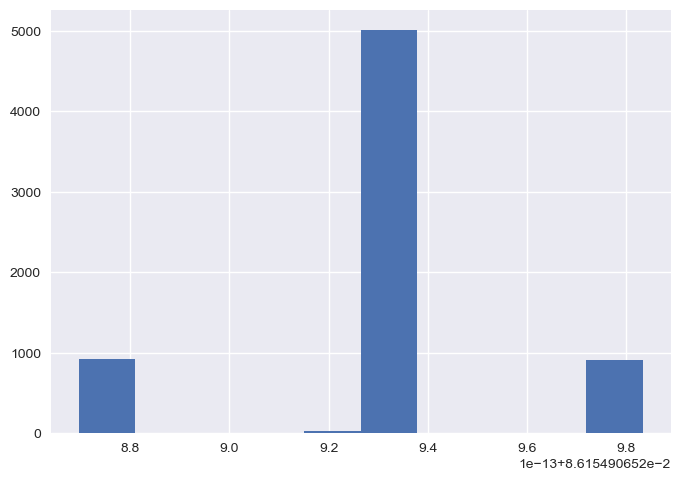

In [123]:
diffs = np.diff(times)
plt.hist(diffs)

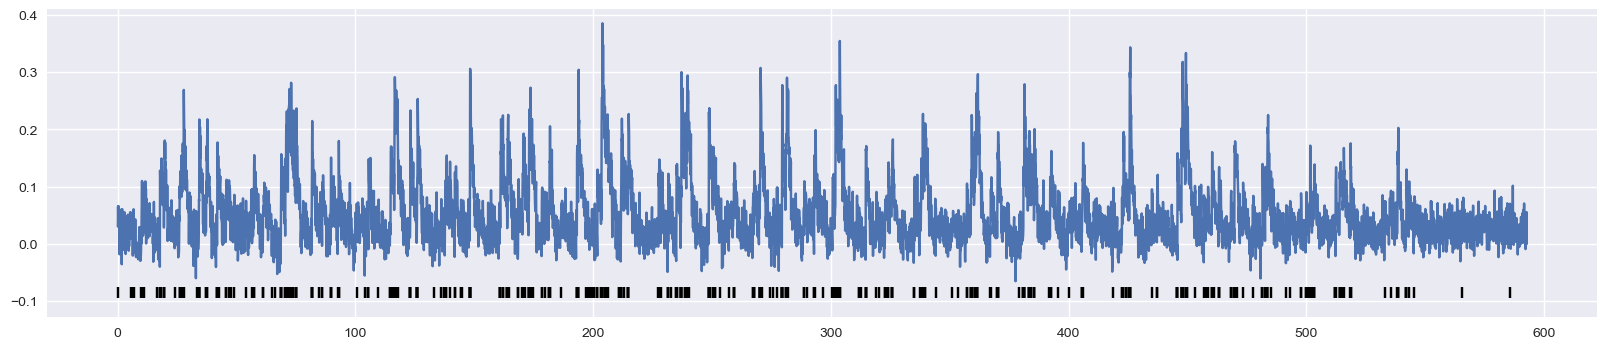

In [124]:
max_dff = np.max( dff[4:])
min_dff = np.min( dff[4:])
plt.figure(figsize=(20, 4))
plt.eventplot(spikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')
plt.plot(times, dff)

### Up-sampling

Number of all resampled data points are t(-1)-t(0)*new_rate. as we take only the integer part, we are throwing away some information and put as many as new_rate data points between each (integer) second.

??? this process will make some error between new spike times and signal!!!

In [125]:
def upsample(times, dff, spikes, new_rate, do_plot=False):
    intpld_signal_func = interp1d(times, dff, kind='cubic')
    evenly_spaced_time = np.linspace(times[0], times[-1], int((times[-1]-times[0])*new_rate))
    upsampled_signal = intpld_signal_func(evenly_spaced_time)
    upsampled_spikes = new_rate*spikes
    
    if do_plot:
        plt.figure(figsize=(20,5))
        plt.plot(upsampled_signal)
        plt.eventplot(upsampled_spikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')

    return upsampled_signal, upsampled_spikes

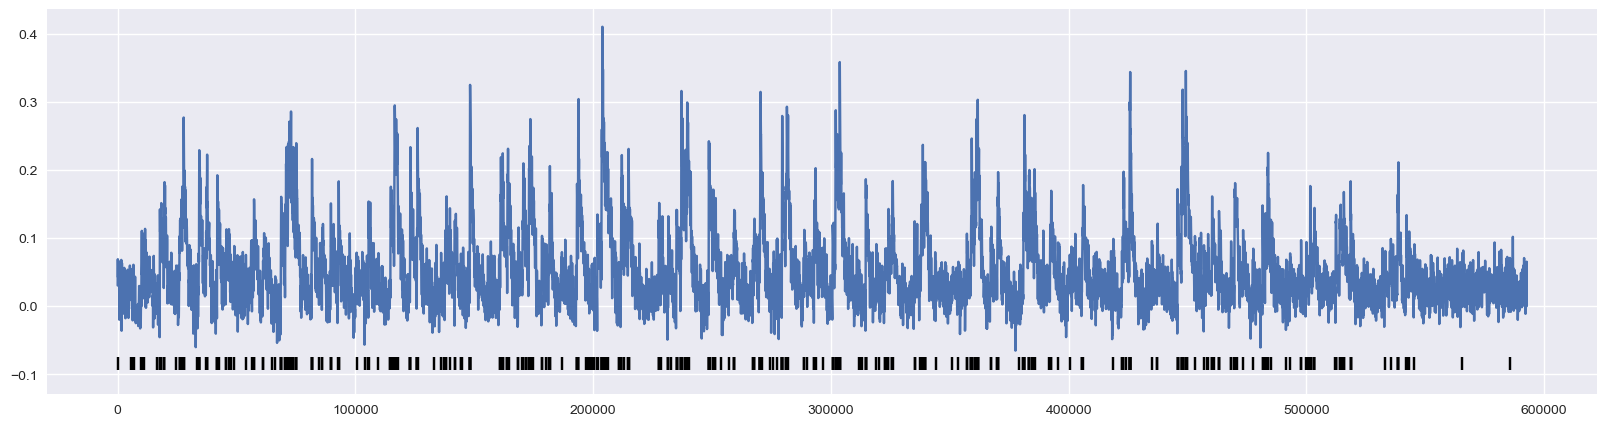

In [126]:
ups_signal, ups_spaikes = upsample(times, dff, spikes, 1000, do_plot=True)

-0.0006750777720052623

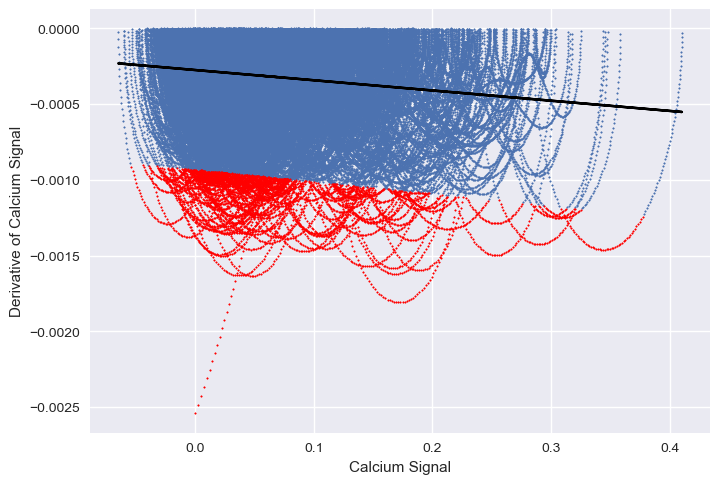

In [139]:
sig1, deriv1 = kef.smoothed_signals(ups_signal, 51)
kef.iqr_outlier(sig1, deriv1, do_plot=True)

In [140]:
10000/6

1666.6666666666667

### interactivly decay selection

In [127]:
from matplotlib.widgets import Cursor, Button
%matplotlib qt

key_held = False
selected_points = []

def on_click(event):
    """Callback function for mouse click event"""
    global key_held
    if not key_held and event.inaxes is not None:
        x, y = event.xdata, event.ydata
        selected_points.append(x)
        #print(f"Selected point: ({x:.2f}, {y:.2f})")
        plt.plot(x, y, 'ro')  # Plot a red dot at the selected point
        plt.draw()

def on_key_press(event):
    """Callback function for key press event"""
    global key_held
    if event.key == 'shift':  # Replace 'ctrl' with the desired key
        key_held = True

def on_key_release(event):
    """Callback function for key release event"""
    global key_held
    if event.key == 'shift':  # Replace 'ctrl' with the desired key
        key_held = False

In [134]:
%matplotlib qt

# Create the plot
fig, ax = plt.subplots()
ax.plot(ups_signal)
ax.eventplot(ups_spaikes, lineoffsets=min_dff - max_dff/20, linelengths=max_dff/20, color='k')
#ax.plot(times, dff)
ax.set_title("Interactive Point Selection")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Connect the mouse click and key press/release events to their respective functions
cid_click = fig.canvas.mpl_connect('button_press_event', on_click)
cid_key_press = fig.canvas.mpl_connect('key_press_event', on_key_press)
cid_key_release = fig.canvas.mpl_connect('key_release_event', on_key_release)

# Create a cursor to visualize mouse position
cursor = Cursor(ax, useblit=True, color='gray', linewidth=1)

plt.show()

In [135]:
selected_points

[18781.218699596793,
 24361.95947580647,
 27600.167086693567,
 33180.907862903245,
 405286.23579189065,
 409882.38243727596,
 425180.9848426299,
 432075.2048107079,
 448686.99197188625,
 451772.9761480735,
 483355.0695256497,
 486506.71293962817,
 538146.9673723119,
 541415.2074596775]

In [136]:
int_points = list(map(int, selected_points))
int_points

[18781,
 24361,
 27600,
 33180,
 405286,
 409882,
 425180,
 432075,
 448686,
 451772,
 483355,
 486506,
 538146,
 541415]

[18781, 24361]


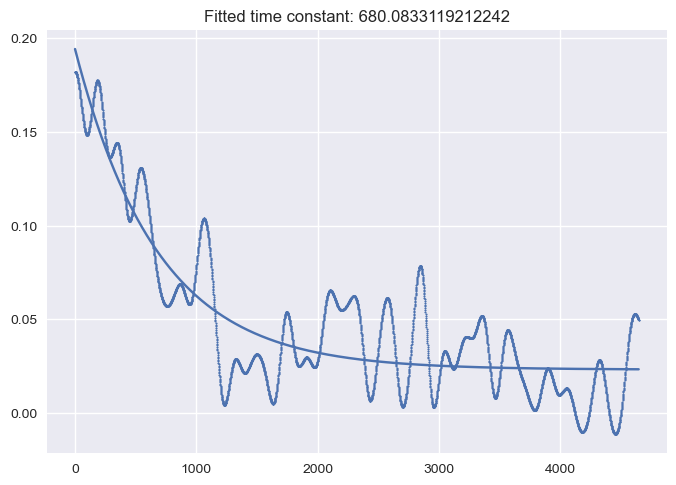

[27600, 33180]


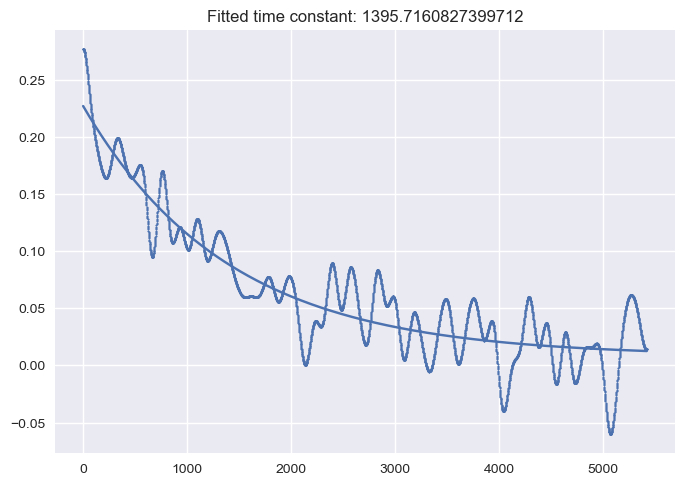

[405286, 409882]


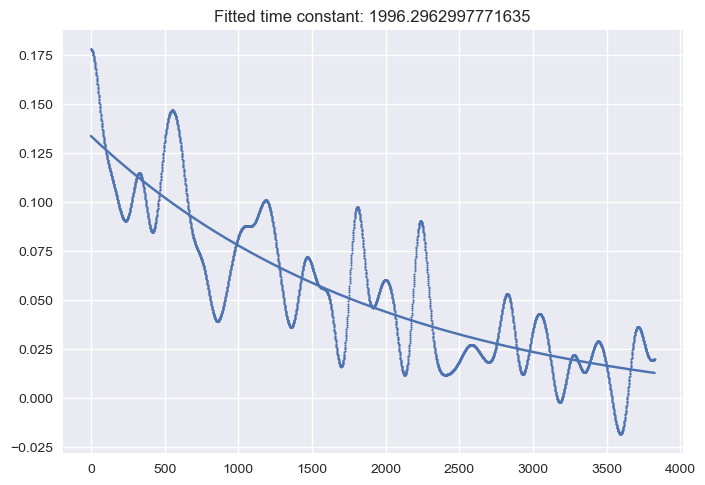

[425180, 432075]


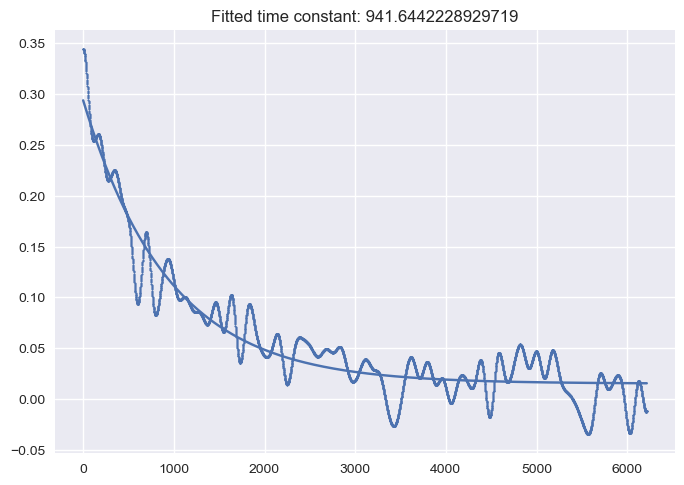

[448686, 451772]


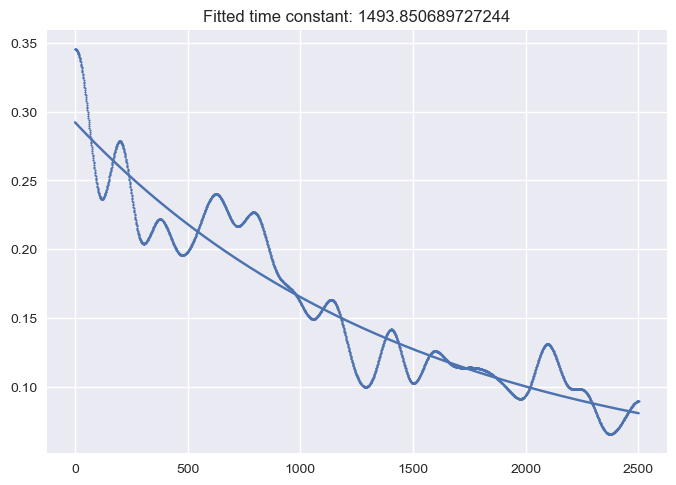

[483355, 486506]


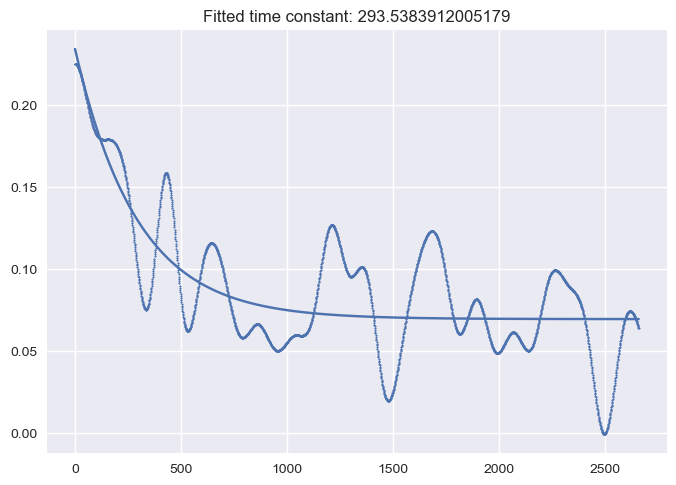

[538146, 541415]


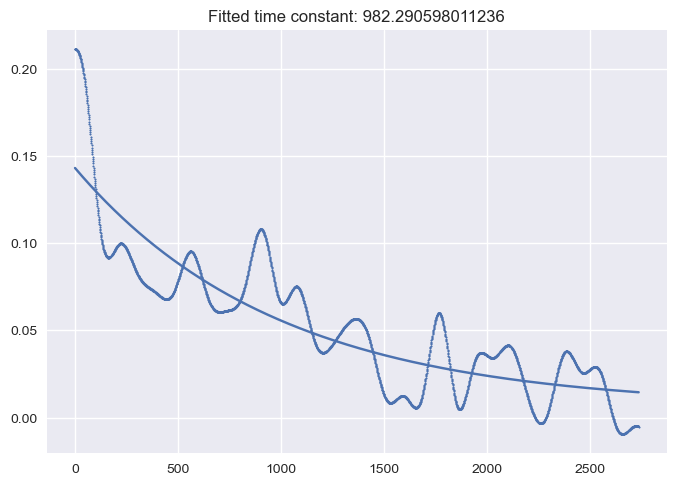

In [137]:
import kernel_fit as kf
%matplotlib inline
fitted_taus=[]
n_points = int(len(int_points))

for i in range(0,n_points, 2):
    start_temp = int_points[i]
    end_temp = int_points[i+1]
    sig_temp = ups_signal[start_temp:end_temp]
    start_temp1 = np.where(sig_temp == np.max(sig_temp))[0][0]
    sig_temp = sig_temp[start_temp1:end_temp]
    print('['+str(start_temp)+', '+str(end_temp)+']')
    tau_temp = kf.kernel_fit(sig_temp, do_plot=True)

    fitted_taus.append(tau_temp)
    plt.show()

In [133]:
i

0

In [46]:
selected_points1 = [24541.114733730064,
 25510.020341495412,
 81847.267596823,
 82454.75603343778,
 88859.30998336156,
 89946.85709411858,
 113710.42058362061,
 114729.30941718338,
 121534.71785267809,
 123380.25234365971,
 137064.45118131433,
 138657.76262519514,
 142554.91629198467,
 143706.837403439,
 149240.36498556557,
 150489.1766577965,
 152029.53883830507,
 152947.91195405542,
 153891.33160932627,
 155536.05437117012,
 166705.8223181058,
 168500.27505085492,
 172740.5003971287,
 174402.0307052297,
 174654.58331206103,
 175292.61095037183,
 175678.08598185127,
 176395.8670749509,
 178522.62586932018,
 179665.75872129368,
 179905.01908566023,
 180609.50793629506,
 180795.59933080236,
 181779.22527319816,
 185718.67243873936,
 187464.7897443437,
 187567.5025270263,
 188635.71546692544,
 188820.59847575412,
 189621.75818067847,
 194675.22708866277,
 195517.47190666015,
 197510.09989070275,
 198557.77027406535,
 200016.29178815839,
 201207.76006727663,
 202460.85601600443,
 203508.52639936705,
 205377.8990441905,
 207062.38868018528]

[24541, 25510]


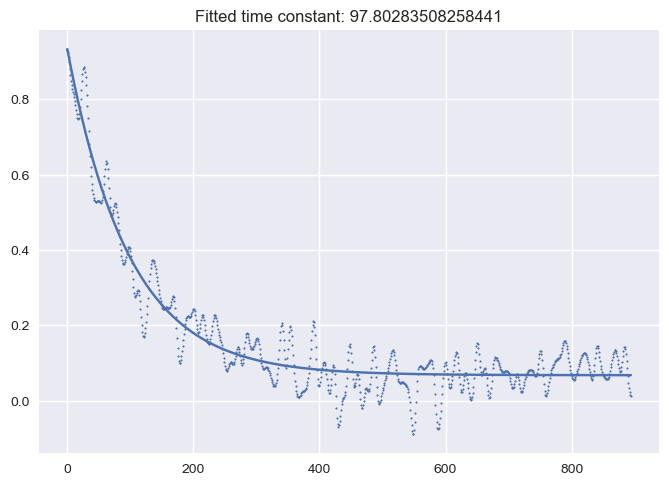

[81847, 82454]


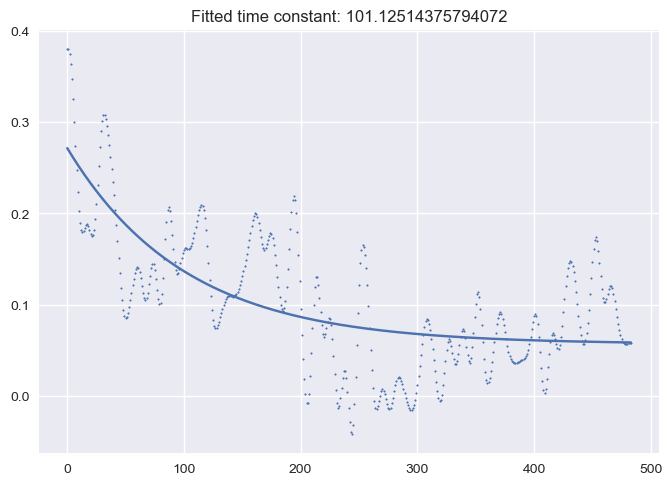

[88859, 89946]


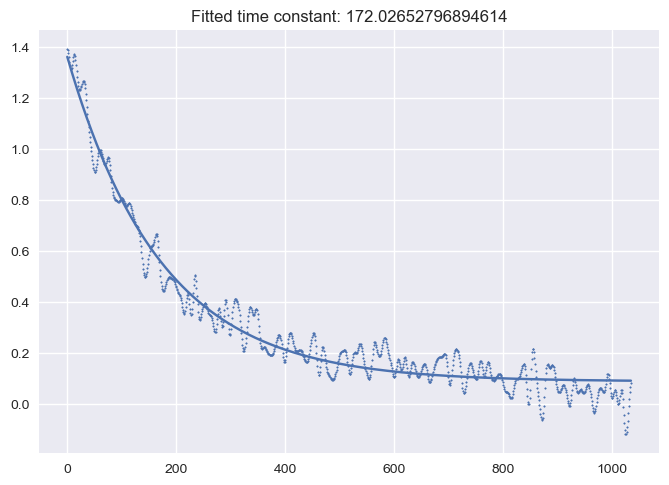

[113710, 114729]


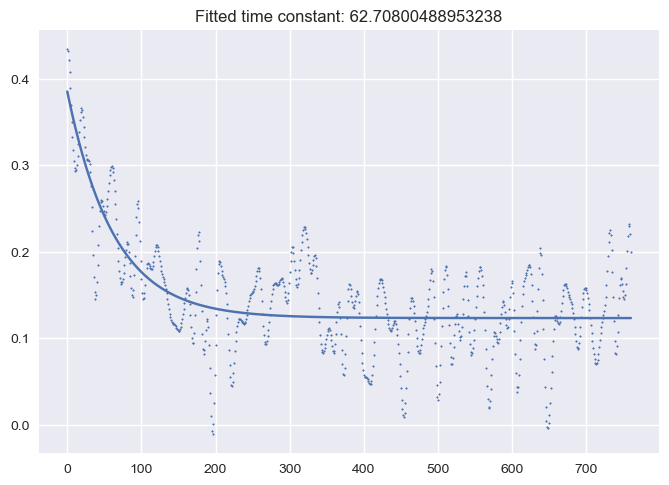

[121534, 123380]


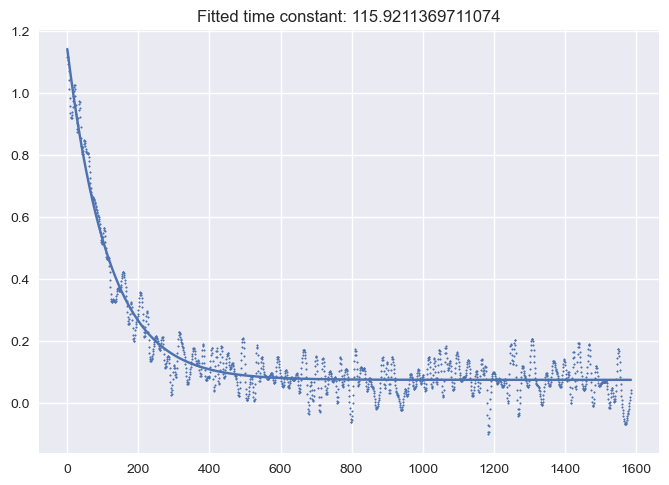

[137064, 138657]


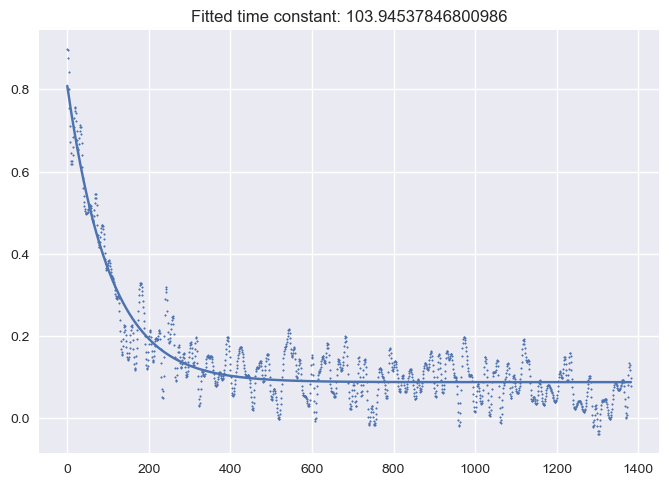

[142554, 143706]


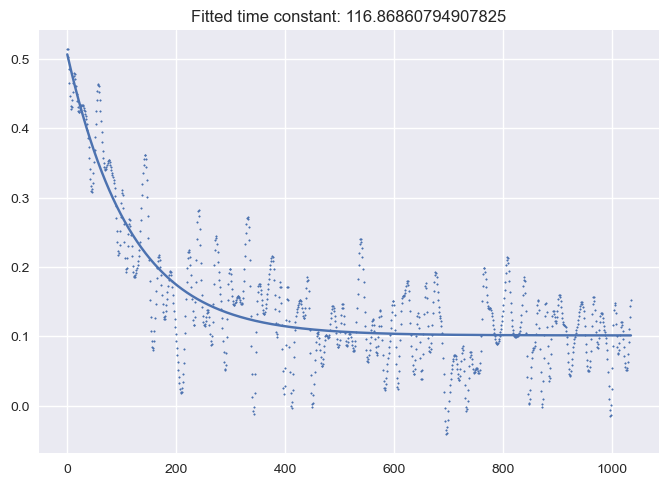

[149240, 150489]


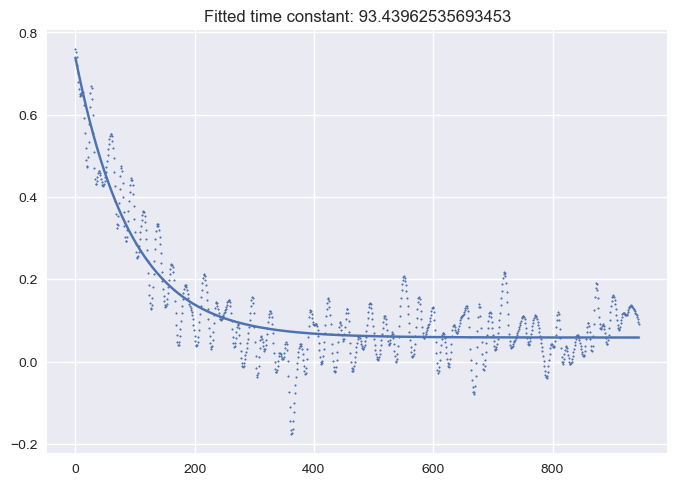

[152029, 152947]


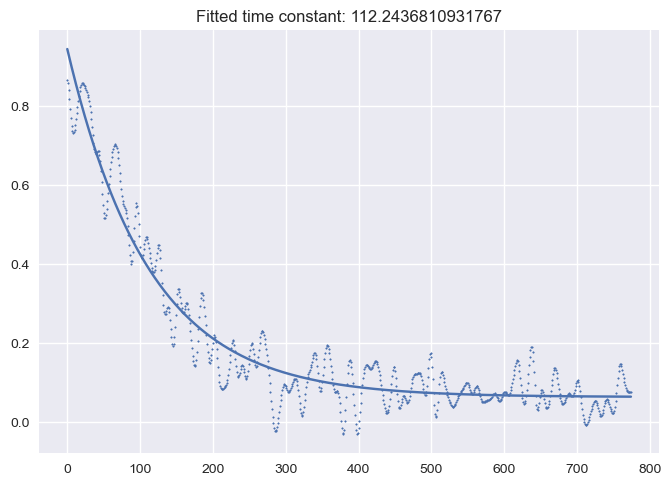

[153891, 155536]


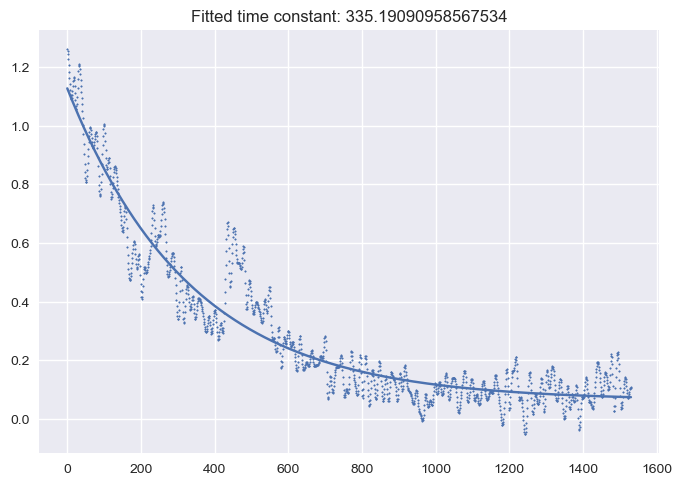

[166705, 168500]


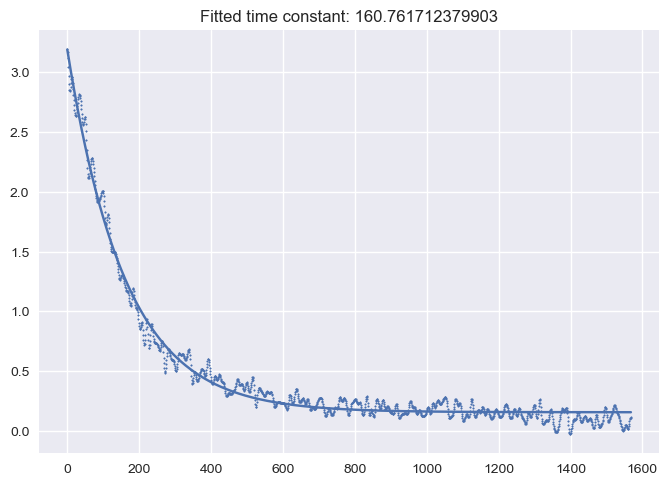

[172740, 174402]


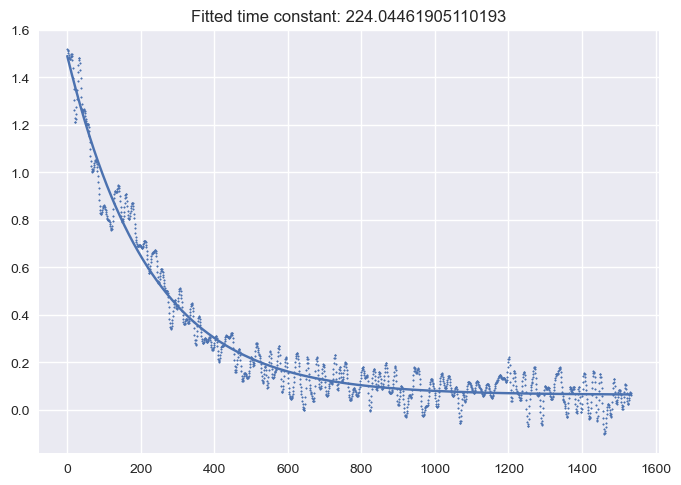

[174654, 175292]


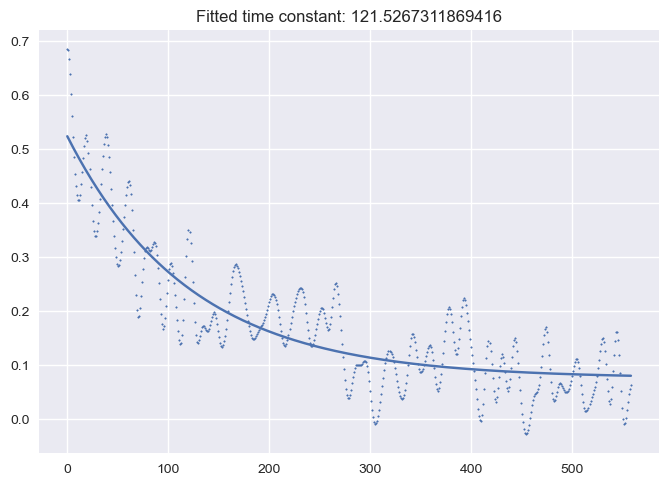

[175678, 176395]


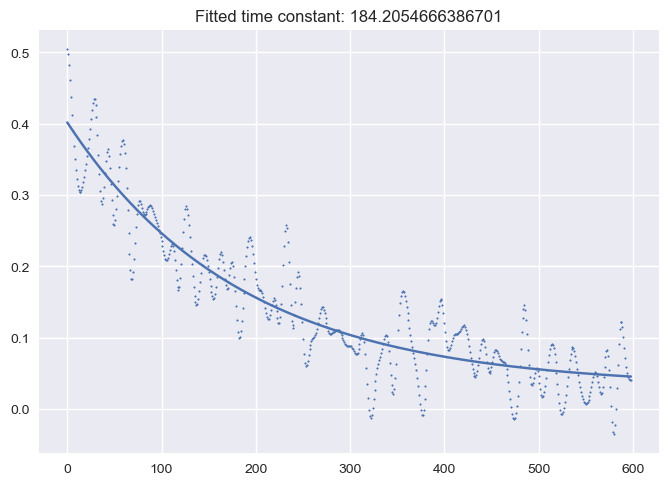

[178522, 179665]


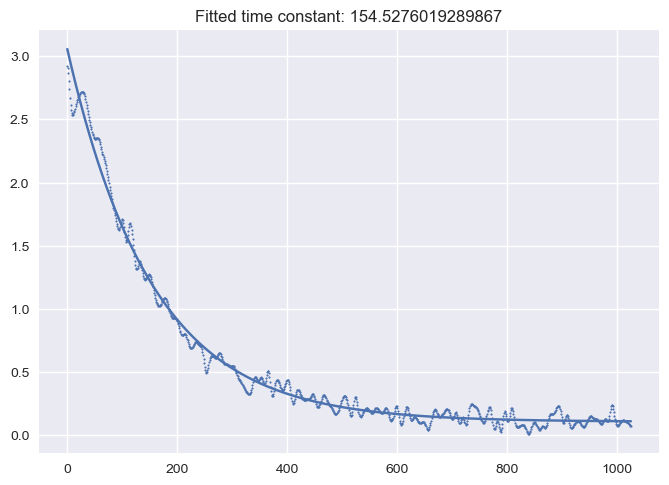

[179905, 180609]


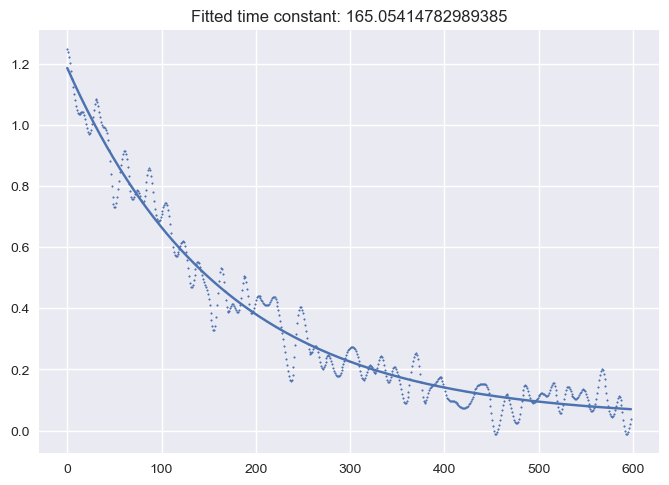

[180795, 181779]


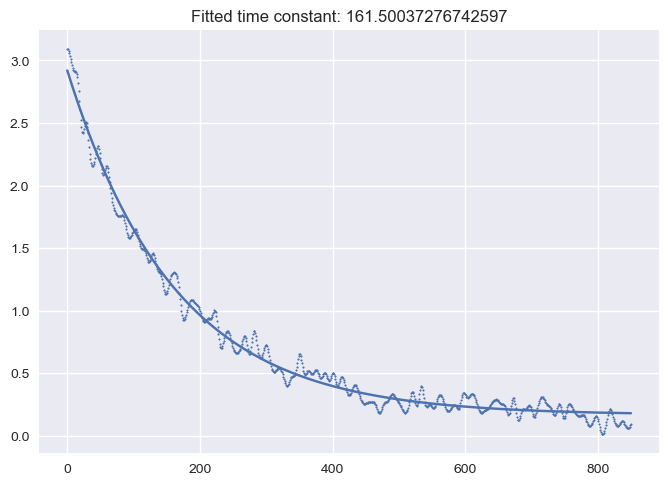

[185718, 187464]


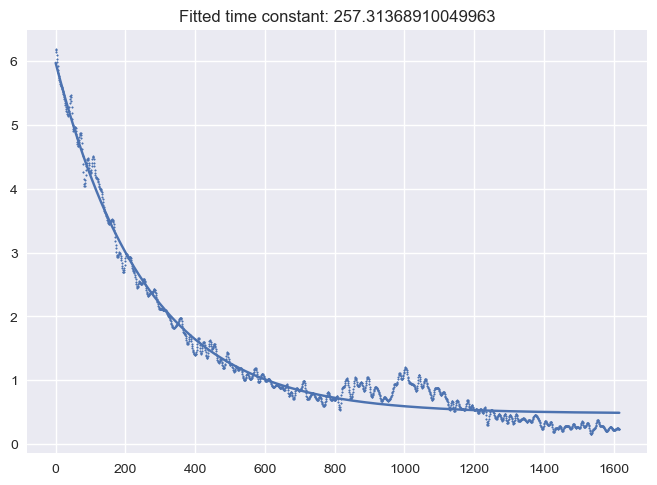

[187567, 188635]


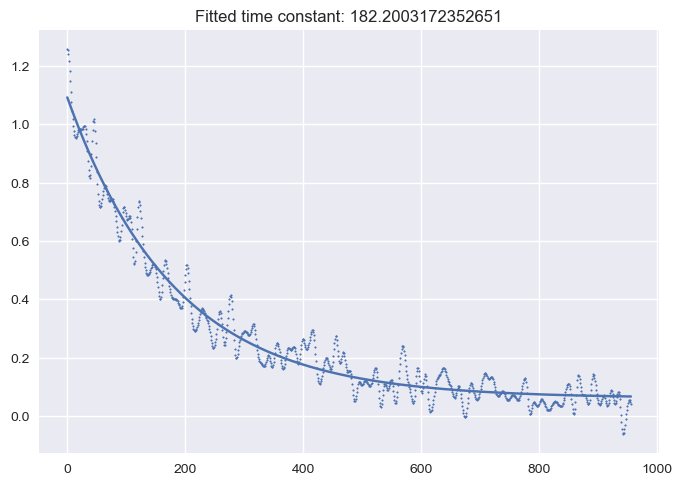

[188820, 189621]


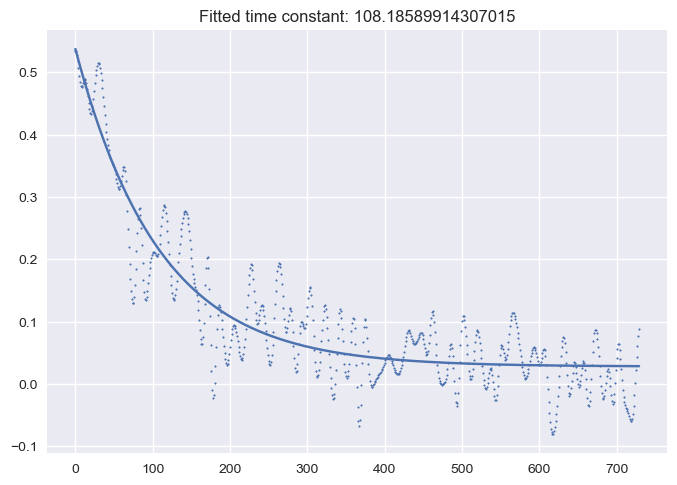

[194675, 195517]


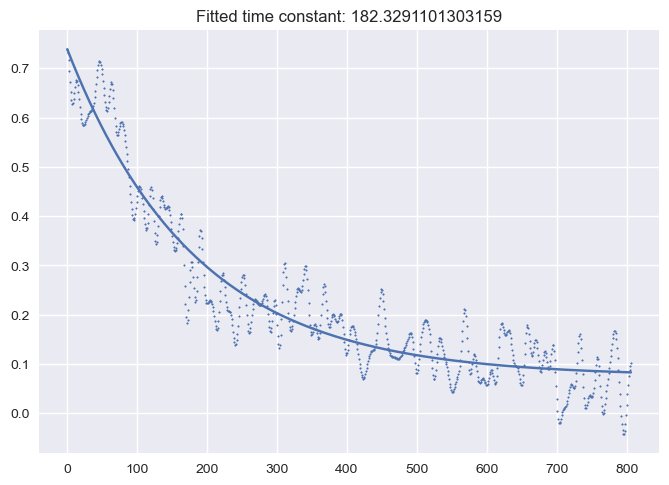

[197510, 198557]


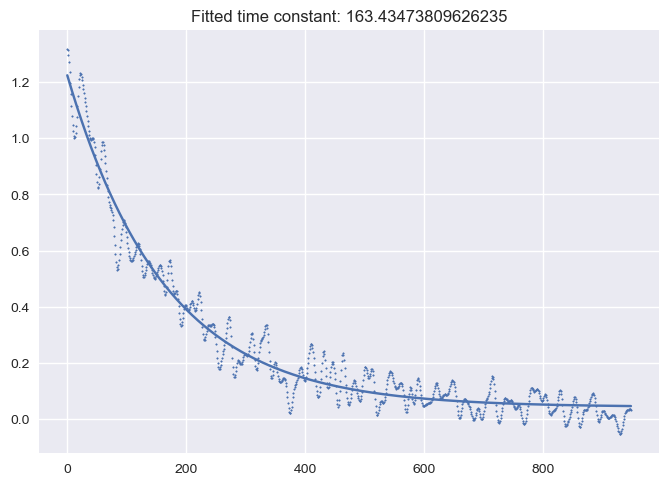

[200016, 201207]


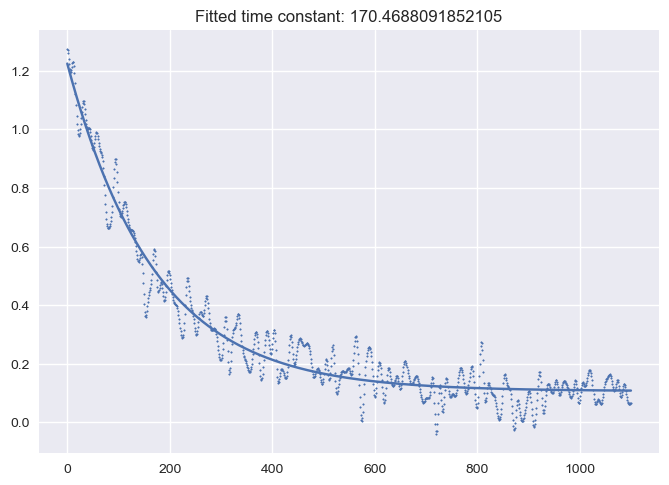

[202460, 203508]


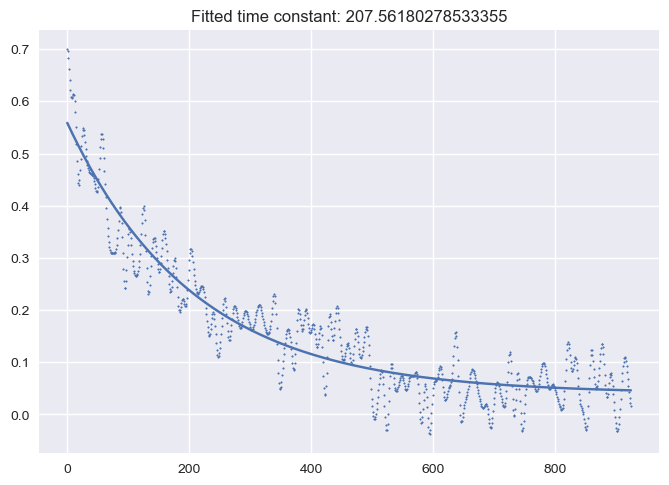

[205377, 207062]


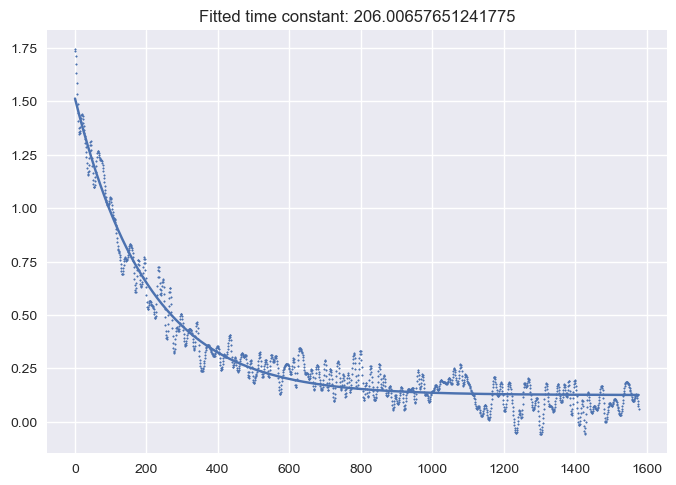

In [45]:
import kernel_fit as kf
%matplotlib inline
fitted_taus=[]
n_points = int(len(int_points))

for i in range(0,n_points, 2):
    start_temp = int_points[i]
    end_temp = int_points[i+1]
    sig_temp = ups_signal[start_temp:end_temp]
    start_temp1 = np.where(sig_temp == np.max(sig_temp))[0][0]
    sig_temp = sig_temp[start_temp1:end_temp]
    print('['+str(start_temp)+', '+str(end_temp)+']')
    tau_temp = kf.kernel_fit(sig_temp, do_plot=True)

    fitted_taus.append(tau_temp)
    plt.show()

In [34]:
plt.hist(fitted_taus, bins=100)
plt.show()

In [22]:
plt.plot(sig_temp)

fitting exponential function to some decays of the signal shows the time constant tau, more or less are in same range and the precision is only the matter of choice where we cut the dacay. Also, Its better to choose the last rise of one spike cluster.
Now we can test for all recordings and find in which interval are real time-constant of calcium signals.

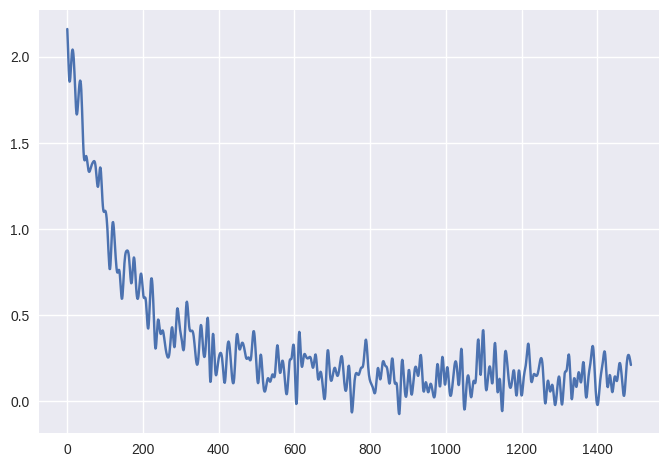

In [20]:
sig_test = upsampled_signal[99260:100750]
plt.plot(sig_test)

138.3740227369667

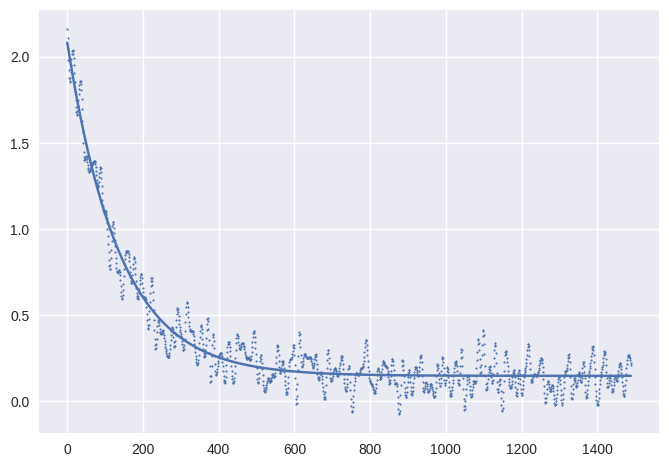

In [21]:
from kernel_fit import *

kernel_fit(sig_test, do_plot=True)

In [28]:
np.where(upsampled_signal[120000:]==np.max(upsampled_signal[120000:]))

(array([4250]),)

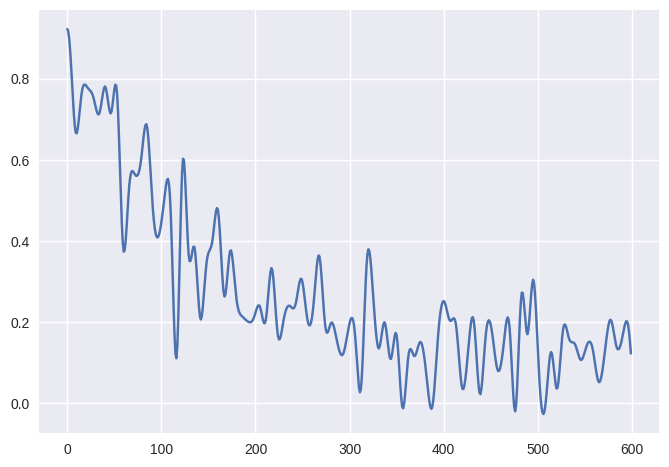

In [29]:
sig_test2 = upsampled_signal[124250:124850]
plt.plot(sig_test2)

213.44519938452623

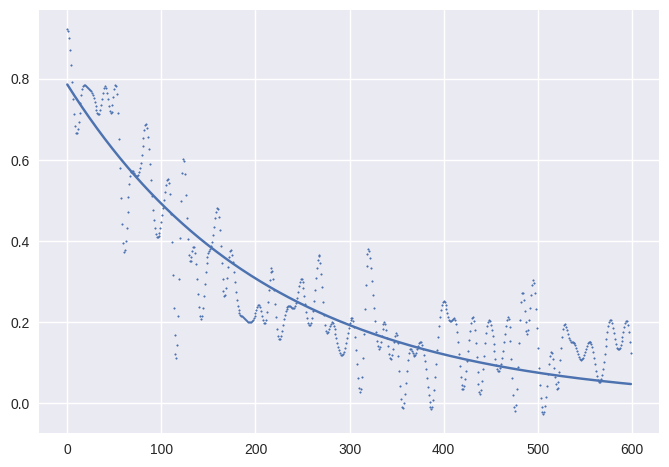

In [30]:
kernel_fit(sig_test2, do_plot=True)

In [31]:
np.shape(upsampled_signal)

(126351,)

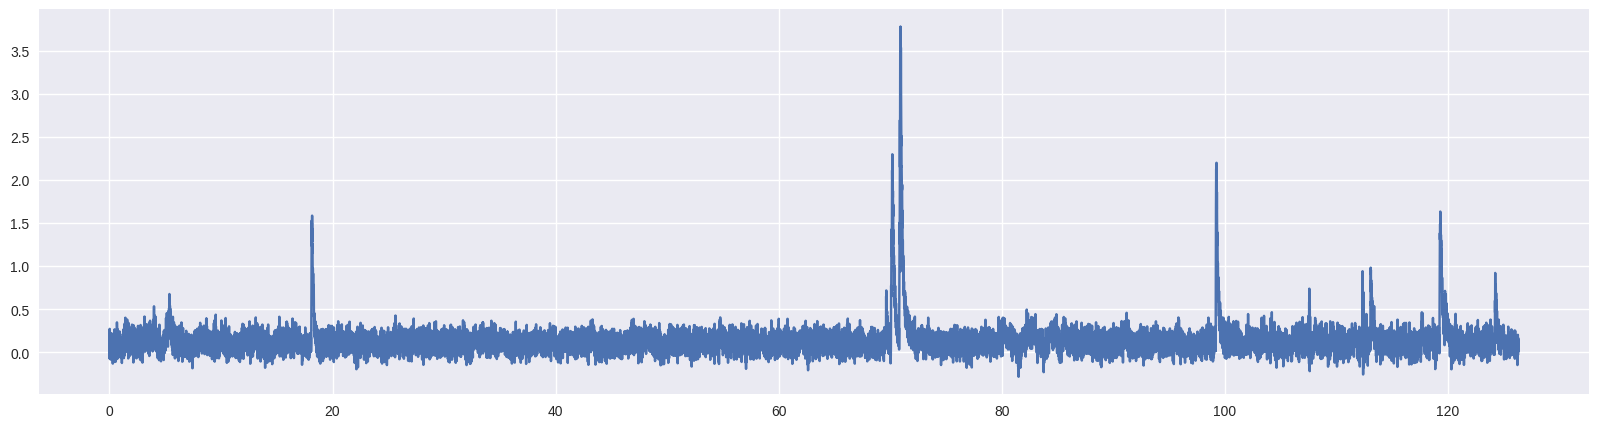

In [32]:
plt.figure(figsize=(20, 5))
plt.plot(evenly_spaced_time, upsampled_signal)

In [33]:
len(upsampled_signal)

126351

In [34]:
evenly_spaced_time

array([6.31790000e-03, 7.31791331e-03, 8.31792663e-03, ...,
       1.26356000e+02, 1.26357000e+02, 1.26358000e+02])

In [35]:
times

array([6.31790000e-03, 1.26358000e-02, 1.89537000e-02, ...,
       1.26345364e+02, 1.26351682e+02, 1.26358000e+02])

In [36]:
np.shape(evenly_spaced_time)

(126351,)

Kernel estimation

In [18]:
from kernel_est_funcs import *

In [19]:
signal , deriv = smoothed_signals(ups_signal, 51)

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(signal)
ax.plot(30*deriv)

In [21]:
scatter_all(signal, 51)

In [22]:
pure_fit(signal, deriv, True)

-0.003945216497507383

In [23]:
1000/4

250.0

In [28]:
iqr_outlier(signal, deriv, do_plot=True)

-0.003633660895819494

In [25]:
10000/36

277.77777777777777

In [26]:
ransac_outlier(signal, deriv, True)

0.0069701917613734414

In [63]:
10000/68

147.05882352941177

In [27]:
zscore_outlier(signal, deriv, do_plot=True)

-0.0023930636506167297

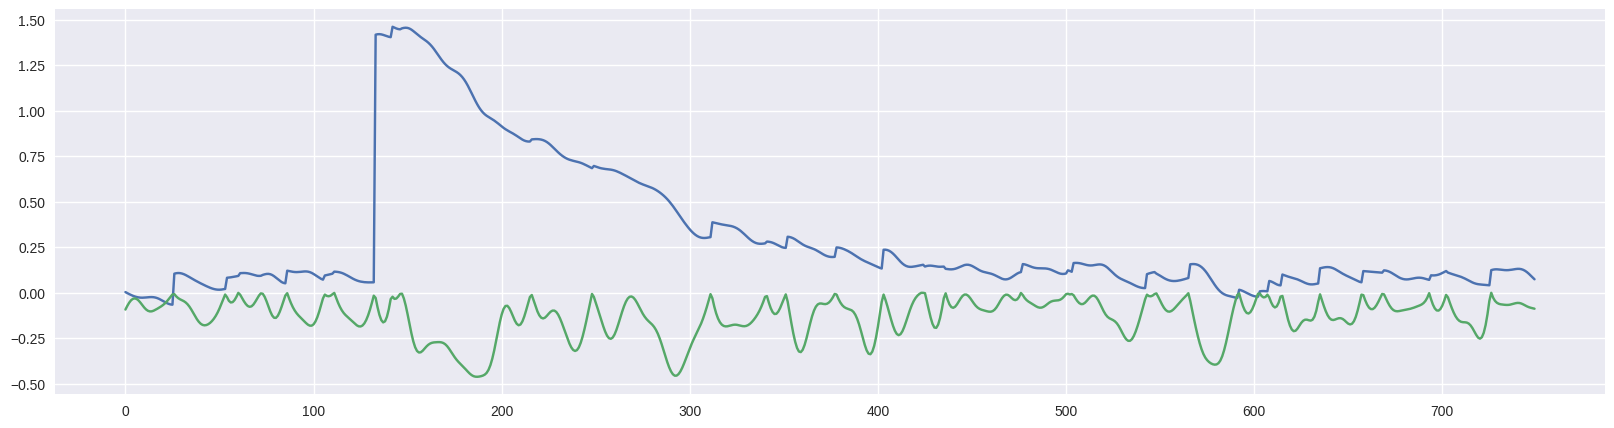

In [45]:
pik_test_sig = signal[9000:9750]
pik_test_deriv = deriv[9000:9750]

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(pik_test_sig)
ax.plot(30*pik_test_deriv)

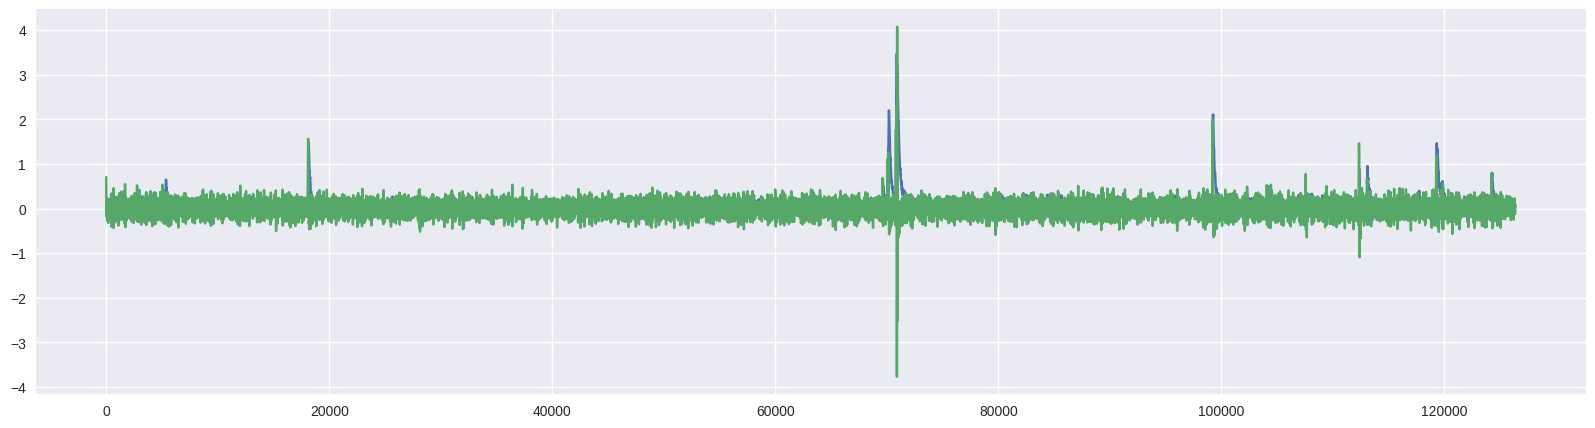

In [46]:
xx = sig.savgol_filter(upsampled_signal, window_length=51, deriv=0, delta=1., polyorder=3)
yy = sig.savgol_filter(upsampled_signal, window_length=51, deriv=1, delta=1., polyorder=3)

#xx = xx[9000:9750]
#yy = yy[9000:9750]
plt.figure(figsize=(20,5))
plt.plot(xx)
plt.plot(30*yy)

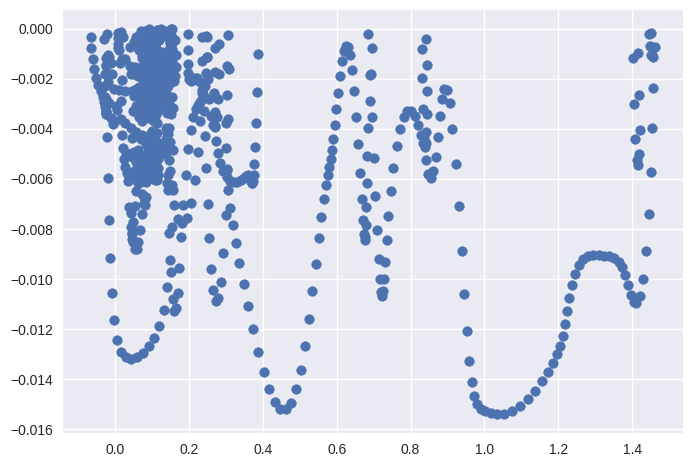

In [47]:
fig, ax = plt.subplots()
ax.scatter(pik_test_sig, pik_test_deriv)

### PSD

In [48]:
from scipy import signal as sig

In [49]:
(f, s) = sig.periodogram(dff, 12, scaling='density')

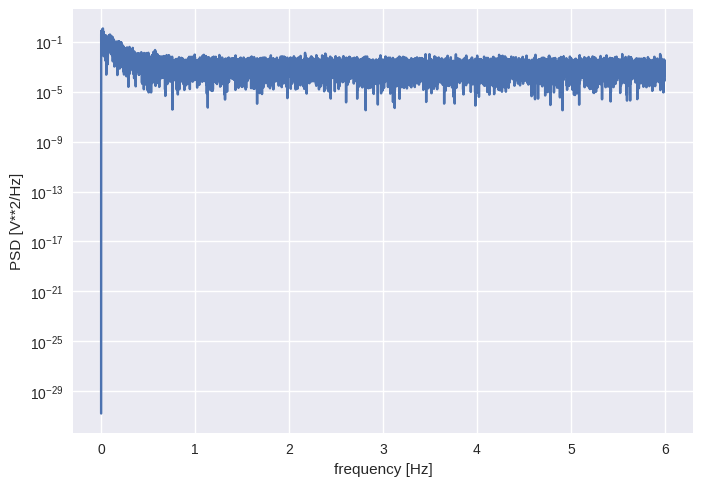

In [50]:
plt.semilogy(f, s)
#plt.ylim([1e-7, 1e2])
#plt.xlim([0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


### Kernel fitting

In [51]:
from scipy.optimize import curve_fit

def func(t, A, tau):
    return A * np.exp(-t/tau)

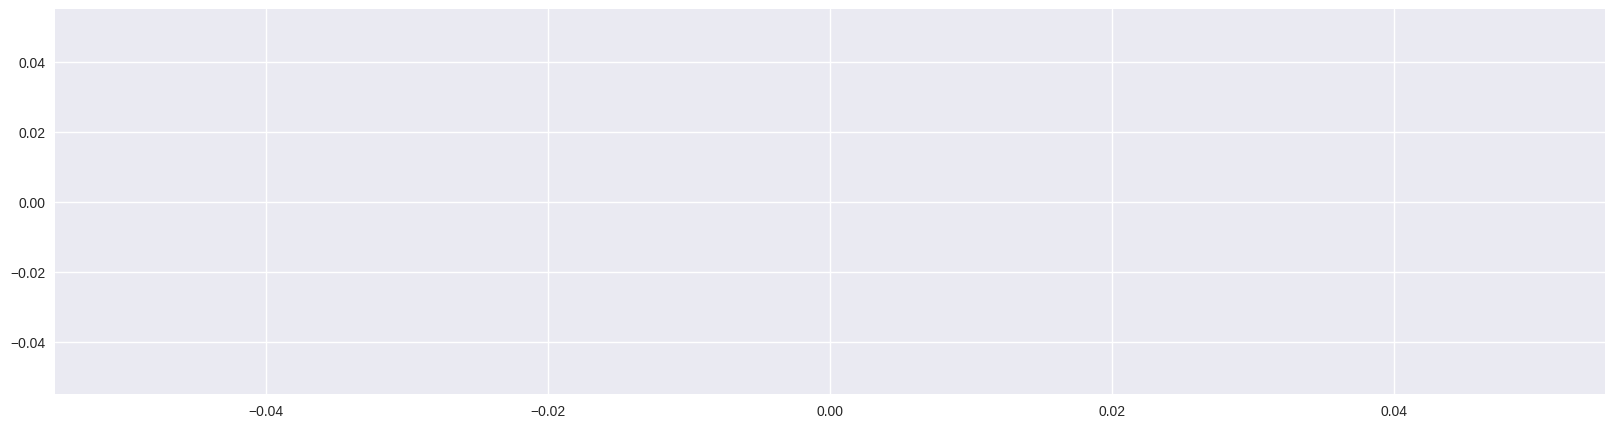

In [52]:
sig1 = upsampled_signal[150000:200000]
time1 = evenly_spaced_time[150000:200000]
plt.figure(figsize=(20, 5))
plt.plot(sig1)

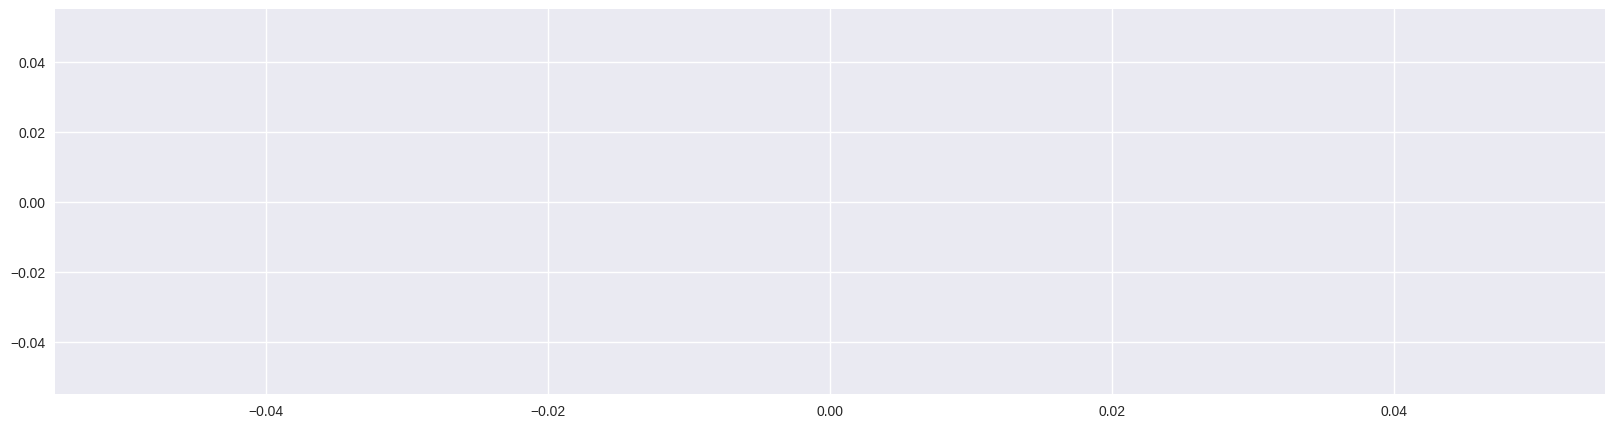

In [53]:
sig11 = sig1[22000:27000]
time11 = time1[22000:27000]
plt.figure(figsize=(20, 5))
plt.plot(sig11)

ValueError: zero-size array to reduction operation maximum which has no identity

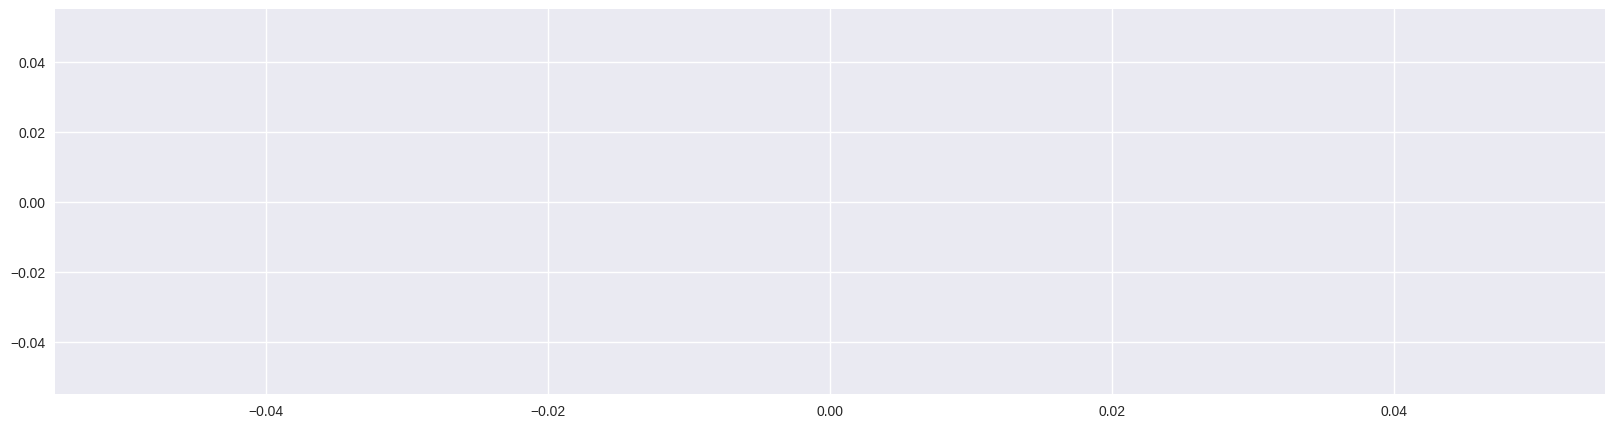

In [54]:
sig2 = sig11[1900:]
sig3 = sig11[1500:1950]
time2 = time11[1900:]
time3 = time11[1500:1950]
plt.figure(figsize=(20, 5))
plt.plot(sig2)
plt.plot(sig3)

print(np.where(sig2 == np.max(sig2))[0])
print(np.where(sig3 == np.max(sig3))[0])
print(np.where(sig3 == np.min(sig3))[0])

In [ ]:
signal1 = sig2[69:]
signal2 = sig3[113:437]
t1 = time2[69:]
t2 = time3[113:437]

In [ ]:
t1

array([173.97624794, 173.97724794, 173.97824795, ..., 177.00426412,
       177.00526413, 177.00626413])

In [ ]:
len(t1)

3031

In [ ]:
t1 = t1 - t1[0]
t1

array([0.00000000e+00, 1.00000535e-03, 2.00001069e-03, ...,
       3.02801619e+00, 3.02901619e+00, 3.03001620e+00])

In [ ]:
t2 = t2 - t2[0]

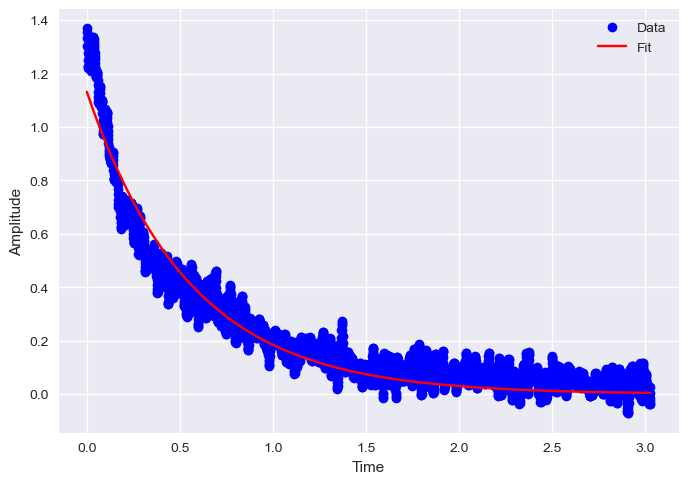

Time constant:  0.5520150567467403


In [ ]:
#x1 = np.arange(0,len(signal1), 1)
x1 = t1
popt, pcov = curve_fit(func, x1, signal1)

# Extract the fitted parameters
A_fit, tau_fit = popt

# Plot the original data and the fitted curve
plt.plot(x1, signal1, 'bo', label='Data')
plt.plot(x1, func(x1, A_fit, tau_fit), 'r-', label='Fit')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the estimated time constant
print('Time constant: ', tau_fit)

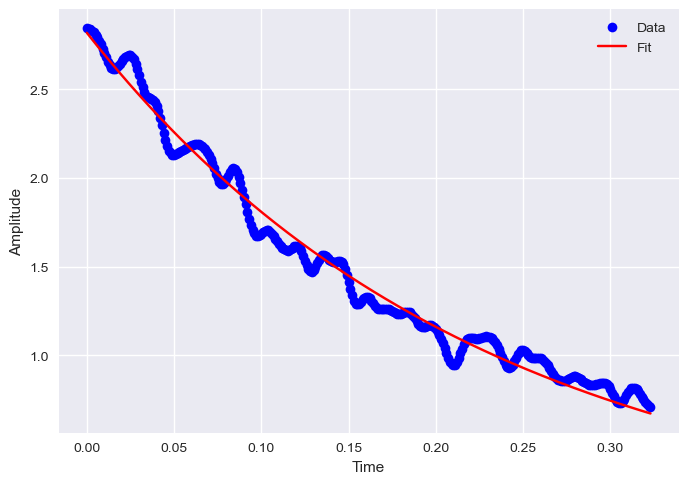

Time constant:  0.2254595399977068


In [ ]:
#x2 = np.arange(0,len(signal2), 1)
x2 = t2
popt, pcov = curve_fit(func, x2, signal2)

# Extract the fitted parameters
A_fit, tau_fit = popt

# Plot the original data and the fitted curve
plt.plot(x2, signal2, 'bo', label='Data')
plt.plot(x2, func(x2, A_fit, tau_fit), 'r-', label='Fit')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the estimated time constant
print('Time constant: ', tau_fit)

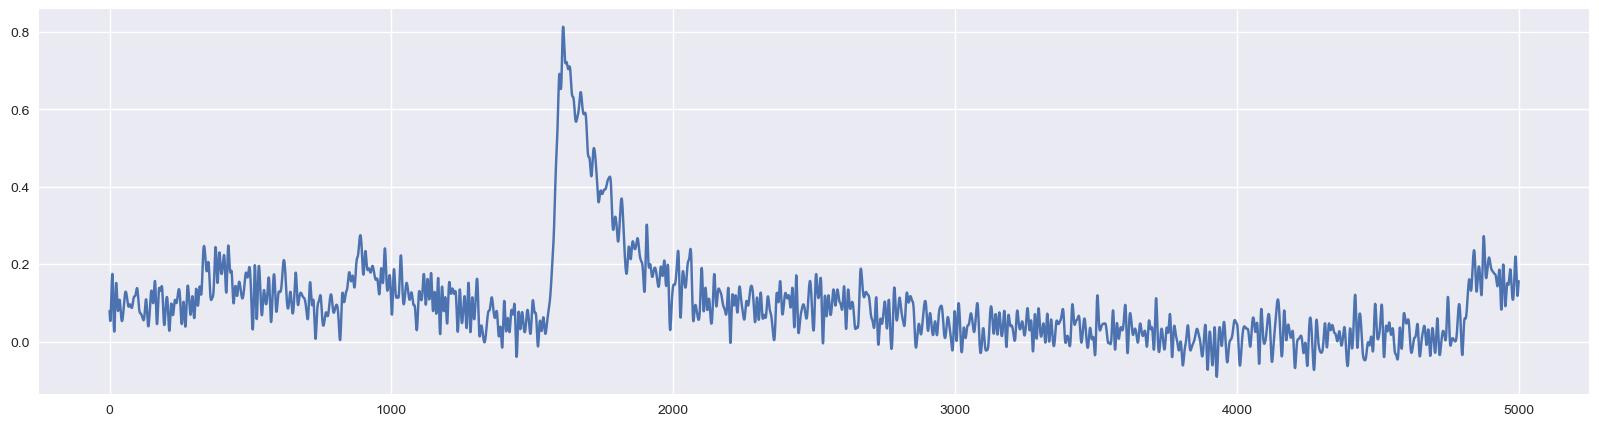

In [ ]:
sig5 = sig1[15000:20000]
time5 = time1[15000:20000]
plt.figure(figsize=(20, 5))
plt.plot(sig5)

In [ ]:
print(np.where(sig5 == np.max(sig5))[0])
print(np.where(sig5 == np.min(sig5))[0])

[1609]
[3928]


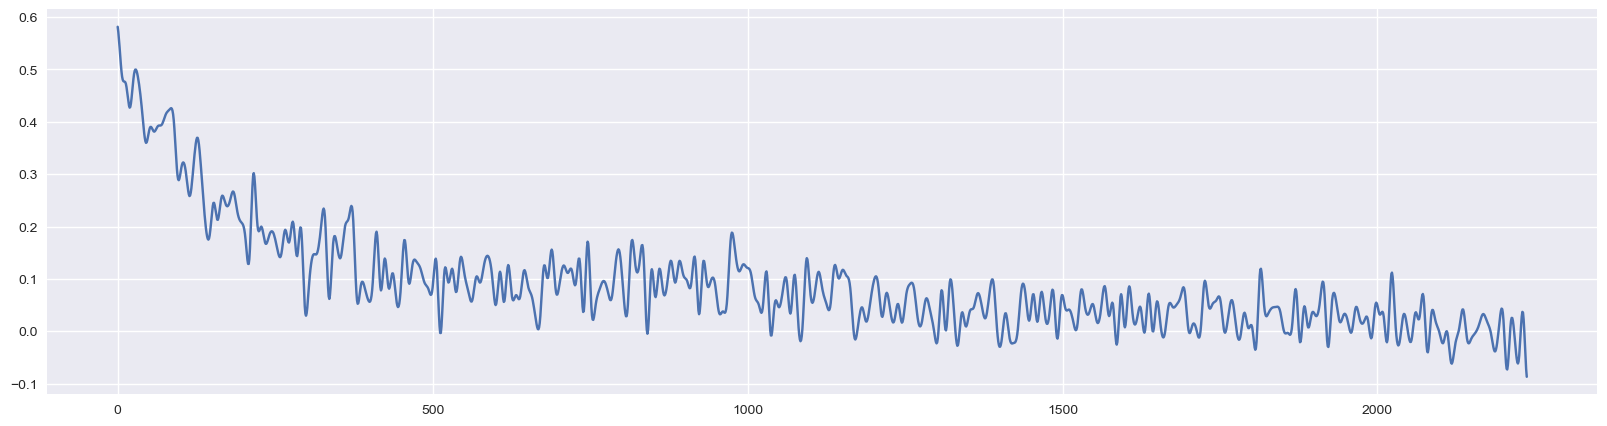

In [ ]:
signal5 = sig5[1690:3928]
t5 = time5[1690:3928]
plt.figure(figsize=(20, 5))
plt.plot(signal5)

In [ ]:
t5 = t5 - t5[0]

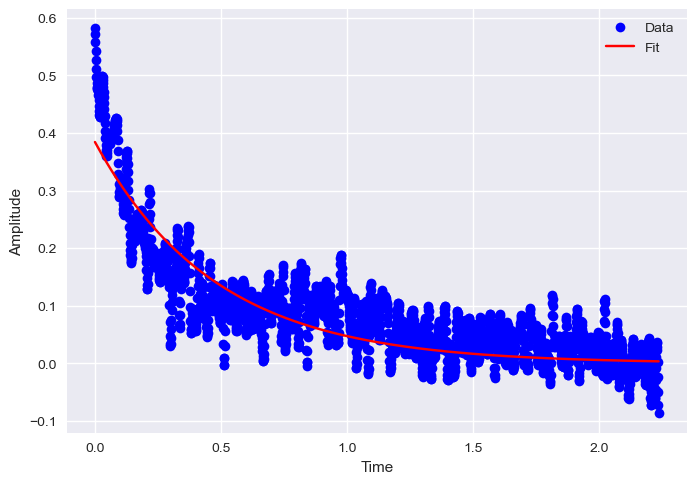

Time constant:  0.4776571698639866


In [ ]:
#x5 = np.arange(0,len(signal5), 1)
x5 = t5
popt, pcov = curve_fit(func, x5, signal5)

# Extract the fitted parameters
A_fit, tau_fit = popt

# Plot the original data and the fitted curve
plt.plot(x5, signal5, 'bo', label='Data')
plt.plot(x5, func(x5, A_fit, tau_fit), 'r-', label='Fit')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Print the estimated time constant
print('Time constant: ', tau_fit)

inf

In [ ]:
import scipy.signal as sig

In [ ]:
sm_signal = sig.savgol_filter(upsampled_signal, window_length=100, deriv=0, delta=0.001, polyorder=3)
sm_deriv = sig.savgol_filter(upsampled_signal, window_length=100, deriv=1, delta=0.001, polyorder=3)

sm_sig = sm_signal + 0.5*sm_deriv

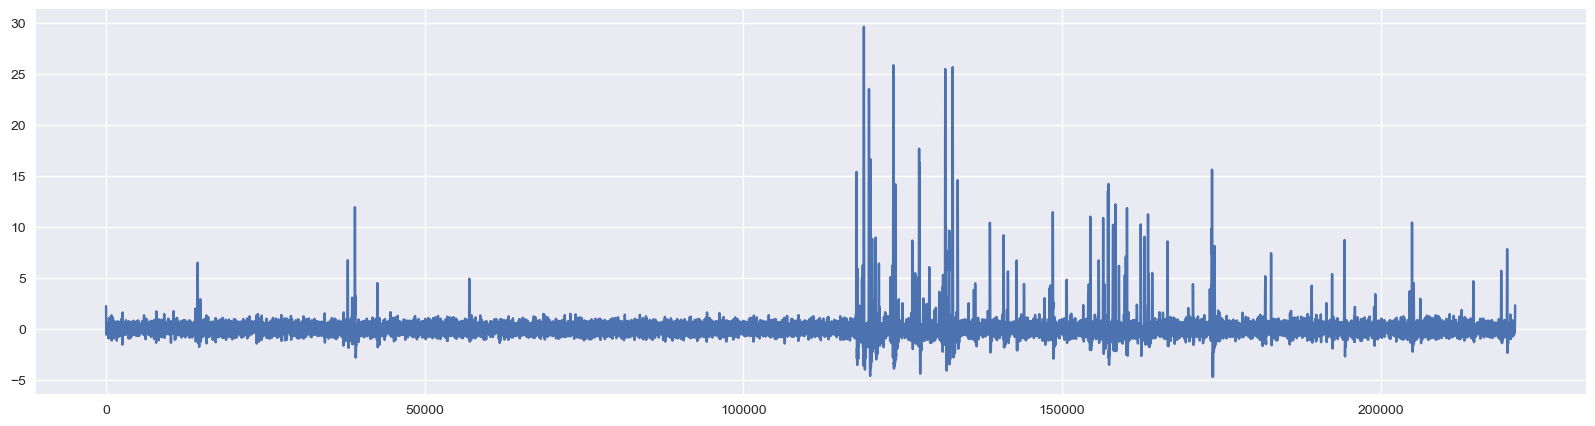

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(sm_sig)